In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as spec
import scipy.integrate as integrate
import matplotlib.animation as anime
#data array

#burrell data
Experimental = np.array(
                #burrell
                [('burrell', 'C40+ optical', 99.99, 145, 1.168, 1), ('benhelm', 'C40+ optical', 99.925, 3000, 1.168, 1), ('myerson', 'C40+ optical', 99.991, 145, 1.168, 1),],

            #fidelity the average is for the two states (burrell)
            dtype=[('author', np.string_), ('ion', np.string_), ('fidelity', 'float'), ('readout time(us)', 'float'), ('coherence T1(s)', 'U8'), ('coherence T2(ms)','U8')])

print(Experimental)

[(b'', b'', 99.99 ,  145., '1.168', '1')
 (b'', b'', 99.925, 3000., '1.168', '1')
 (b'', b'', 99.991,  145., '1.168', '1')]


In [82]:
"Assuming the rates of |B〉→|D〉 and |D〉→|B〉 pumping are both zero and we have an ideal detector" 

#functions
def nc(RB, RD, tb):
    x = RB*tb/(np.log(1+(RB/RD)))
    return x

def Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def Dmean(RD, tb):
    x = RD*tb
    return x

def Bo(N, Bmean):
    X = (np.power(Bmean,N)) * (np.exp(Bmean)) / spec.factorial(N)
    return X

def Do(N, Dmean):
    X = (np.power(Dmean,N)) * (np.exp(Dmean)) / spec.factorial(N)
    return X


#eB = np.sum(B0) #for n<nc
#eD = np.sum(D0) #for n>nc
#e = (eB+eD)/2

In [83]:
'''In general, the rates for pumping between the qubit states will not be zero. For the
calcium optical qubit the |B〉→|D〉 pumping rate remains negligible (section 4.3.3), but
the rate of |D〉→|B〉pumping due to decay from the metastable D5/2 state is appreciable
at 1/τ where τ = 1.168(7) s is the average lifetime of the shelf state [138].
The count distribution B0(n) for trials prepared in the |B〉 state remains Poisson 
distributed with mean (RB + RD)tb, but the distribution for trials initially prepared in
the |D〉 state is modified to contain two terms:'''

#functions
'''
def nc(RB, RD, tb):
    x = RB*tb/(np.log(1+(RB/RD)))
    return x

def Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def Dmean(RD, tb):
    x = RD*tb
    return x

def Bo(N, Bmean):
    x = (np.power(Bmean,N)) * (np.exp(Bmean)) / np.math.factorial(N)
    return x

#complicated
def D_Xo(n, RB, RD, tb, tau):
    x = np.int
    integrate.quad(lambda x: special.jv(2.5,x), RD*tb, 4.5)
    return x

def Do(n, Dmean, tb, tau):
    x = (np.e**(-tb/tau) * ((Dmean)**n) * (np.exp(Dmean)) / np.math.factorial(n)) + Xo
    return x
'''


#eB = np.sum(B0) #for n<nc
#eD = np.sum(D0) #for n>nc
#e = (eB+eD)/2

'\ndef nc(RB, RD, tb):\n    x = RB*tb/(np.log(1+(RB/RD)))\n    return x\n\ndef Bmean(RB, RD, tb):\n    x = (RB+RD)*tb\n    return x\n\ndef Dmean(RD, tb):\n    x = RD*tb\n    return x\n\ndef Bo(N, Bmean):\n    x = (np.power(Bmean,N)) * (np.exp(Bmean)) / np.math.factorial(N)\n    return x\n\n#complicated\ndef D_Xo(n, RB, RD, tb, tau):\n    x = np.int\n    integrate.quad(lambda x: special.jv(2.5,x), RD*tb, 4.5)\n    return x\n\ndef Do(n, Dmean, tb, tau):\n    x = (np.e**(-tb/tau) * ((Dmean)**n) * (np.exp(Dmean)) / np.math.factorial(n)) + Xo\n    return x\n'

Text(0.5, 1.0, 'Count Probability in a Given State')

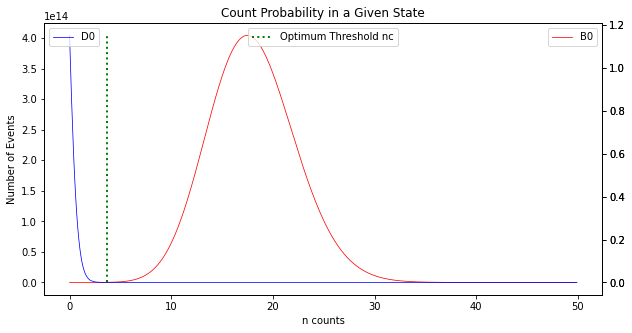

In [84]:
#Variables

#Burrell quoted
#RB = 55800 s−1
#RD = 442 s−1
#tb = 420 us = .00042
#n = counts
#nc = diferentiation counts

n = 50

#Bright state scatter rate
Rb = 55800
#Dark state scatter rate
Rd = 442
#n counts recorded during bin time
tb = .00032
#count threshold
nc = nc(Rb, Rd, tb)

step = .1
N = np.arange(start=0,stop=n,step=step)

#Graphing
Bmean = Bmean(Rb,Rd,tb)
BM = np.full(np.int_(n/step),Bmean)
Dmean = Dmean(Rd,tb)
DM = np.full(np.int_(n/step),Dmean)

#n counts in tb from bright
B0 = Bo(N,BM)

#n counts in tb from dark
D0 = Do(N,DM)
#print(B0)
#print(D0)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(N, B0, lw=0.75, c="r", label = "B0")
ax1.set_ylabel("Number of Events")
ax1.set_xlabel("n counts")
ax2 = plt.twinx(ax1)
ax2.plot(N, D0, lw=0.75, c="b", label = "D0")
ax3 = plt.twinx(ax1)
plt.vlines(nc,ymin=0,ymax=np.max(D0), colors='green', ls=':', lw=2, label='Optimum Threshold nc')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')
ax3.legend(loc = 'upper center')
plt.title("Count Probability in a Given State")

(0.610591547772937, 6.283423838412133e-13)
(113367371360.80043, 0.001258630659259912)


TypeError: only size-1 arrays can be converted to Python scalars

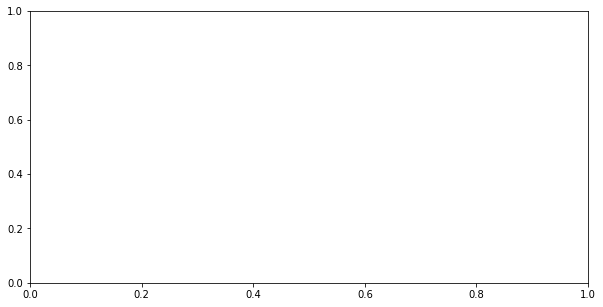

In [85]:
#Optimal Time vs Collection Efficiency

#Integrate under the curves to find the error
#Plot error vs tb

Rb = 55800
Rd = 442

def D_integrand(n, Rd, tb):
    return (np.power(Rd*tb,n)) * (np.exp(Rd*tb)) / spec.factorial(n)
    
#0 to nc w/ D0
def ed(tb): 
    return integrate.quad(D_integrand, 0, nc, args=(Rd, tb))

def B_integrand(n, Rb, Rd, tb):
    return (np.power((Rb+Rd)*tb,n)) * (np.exp((Rb+Rd)*tb)) / spec.factorial(n)

#nc to inf w/ B0
def eb(tb):
    return integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))

print(ed(.00032))
print(eb(.00032))

tb = np.arange(start=0,stop=.0005,step=.00001)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(tb, ed(tb), lw=0.75, c="r", label = "B0")
ax1.set_ylabel("Error")
ax1.set_xlabel("Bin Time (s)")

plt.title("Count Probability in a Given State")

